# Data Preparation and Cleaning

In [74]:
! git clone https://www.github.com/carascott/project_chd

fatal: destination path 'project_chd' already exists and is not an empty directory.


In [75]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report

test = pd.read_csv('/content/project_chd/fhs_test.csv')
train = pd.read_csv('/content/project_chd/fhs_train.csv')

# Basic preprocessing
imputer = SimpleImputer(strategy='mean')
scaler = StandardScaler()

x_train = imputer.fit_transform(train.drop('TenYearCHD', axis=1))
x_test = imputer.transform(test.drop('TenYearCHD', axis=1))

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

y_train = train['TenYearCHD']
y_test = test['TenYearCHD']

In [76]:
print(test.columns)

Index(['Unnamed: 0', 'sex', 'age', 'education', 'currentSmoker', 'cigsPerDay',
       'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol',
       'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')


In [77]:
print(train.columns)

Index(['Unnamed: 0', 'sex', 'age', 'education', 'currentSmoker', 'cigsPerDay',
       'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol',
       'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')


In [78]:
print(train)

      Unnamed: 0  sex  age  education  currentSmoker  cigsPerDay  BPMeds  \
0           1267    1   58        1.0              0         0.0     0.0   
1           1209    0   40        1.0              1        15.0     0.0   
2           2050    0   52        1.0              0         0.0     0.0   
3           1183    1   38        2.0              1        43.0     0.0   
4           3225    0   43        1.0              0         0.0     0.0   
...          ...  ...  ...        ...            ...         ...     ...   
3175        1411    1   36        4.0              0         0.0     0.0   
3176         262    1   47        1.0              1        20.0     0.0   
3177        1459    1   52        2.0              0         0.0     0.0   
3178         733    0   48        1.0              1         5.0     0.0   
3179         691    0   60        2.0              1        15.0     0.0   

      prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
0       

In [79]:
# Cleaning sex column
train['sex'] = train['sex'].replace({0: 'Female', 1: 'Male'})

In [80]:
# Cleaning education column
train['education'] = train['education'].replace( {1:'Some High-school',
                                                  2: 'High-school/GED',
                                                  3:'Some college/vocational school',
                                                  4: 'College',
                                                  'Unanswered/No Education': None} )
train['education'].fillna('Unanswered/No education', inplace=True)

In [81]:
# Cleaning cigs per day column
train['cigsPerDay'].fillna(0, inplace=True)

In [82]:
# Cleaning current smoker column
train['currentSmoker'] = train['currentSmoker'].replace({1: 'Yes', 0: 'No'})
train = train[train['BMI'] <= 40]
# Removing excessively large BMI's (BMI of 30-40 indicates obesity)

In [83]:
# Cleaning BPMeds column
train['BPMeds'] = train['BPMeds'].replace({0: 'No', 1: 'Yes'})
train['BPMeds'].fillna('No', inplace=True)
# Assuming one's lack of answer means they did not use BP medication

<ipython-input-83-1a4c3f41f339>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['BPMeds'] = train['BPMeds'].replace({0: 'No', 1: 'Yes'})
<ipython-input-83-1a4c3f41f339>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['BPMeds'].fillna('No', inplace=True)


In [84]:
# Cleaning prevalent stroke column
train['prevalentStroke'] = train['prevalentStroke'].replace({0: 'No', 1: 'Yes'})

In [85]:
# Cleaning prevalent Hypertensive
train['prevalentHyp'] = train['prevalentHyp'].replace({0: 'No', 1: 'Yes'})

In [86]:
# Cleaning diabetes
train['diabetes'] = train['diabetes'].replace({0: 'No', 1: 'Yes'})

In [87]:
# Cleaning Ten-Year CHD
train['TenYearCHD'] = train['TenYearCHD'].replace({0: 'No', 1: 'Yes'})

In [88]:
unique_responses = train['TenYearCHD'].value_counts()
print(unique_responses)
na_count = train['TenYearCHD'].isna().sum()
print(f"Number of NAs: {na_count}")

TenYearCHD
No     2670
Yes     473
Name: count, dtype: int64
Number of NAs: 0


In [89]:
for column_name in train.columns.tolist():
    print(column_name)
# sex (CATEGORICAL)
# age (CATEGORICAL)
# education (CATEGORICAL)
# currentSmoker (CATEGORICAL)
# cigsPerDay (NUMERIC)
# BPMeds (CATEGORICAL)
# prevalentStroke (CATEGORICAL)
# prevalentHyp (CATEGORICAL)
# diabetes  (CATEGORICAL)
# totChol (NUMERIC)
# sysBP (NUMERIC)
# diaBP (NUMERIC)
# BMI (NUMERIC)
# heartRate (NUMERIC)
# glucose (NUMERIC)
# TenYearCHD (CATEGORICAL)

Unnamed: 0
sex
age
education
currentSmoker
cigsPerDay
BPMeds
prevalentStroke
prevalentHyp
diabetes
totChol
sysBP
diaBP
BMI
heartRate
glucose
TenYearCHD


<Axes: xlabel='age', ylabel='Density'>

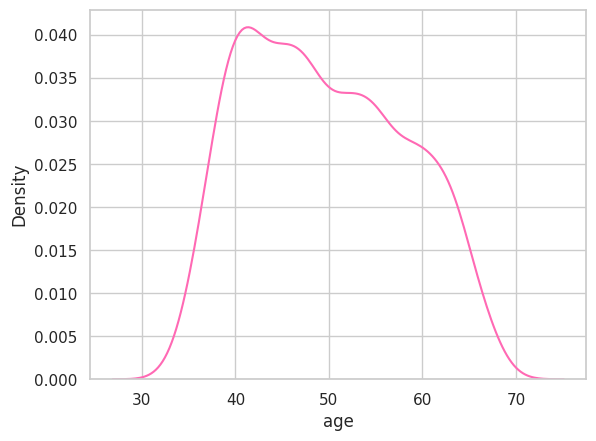

In [90]:
sns.kdeplot(data=train, x='age', color="hotpink")

<Axes: xlabel='cigsPerDay', ylabel='Density'>

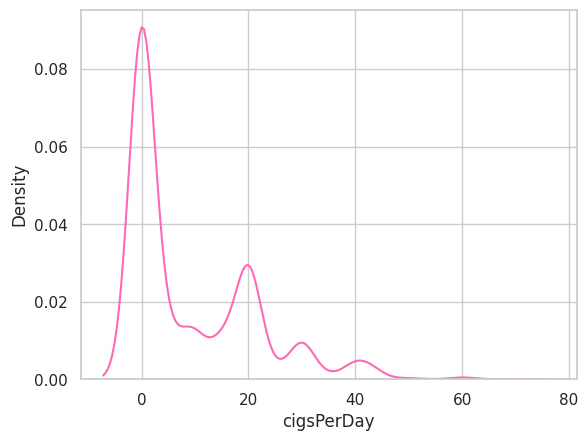

In [91]:
sns.kdeplot(data=train, x='cigsPerDay', color="hotpink")

<Axes: xlabel='totChol', ylabel='Density'>

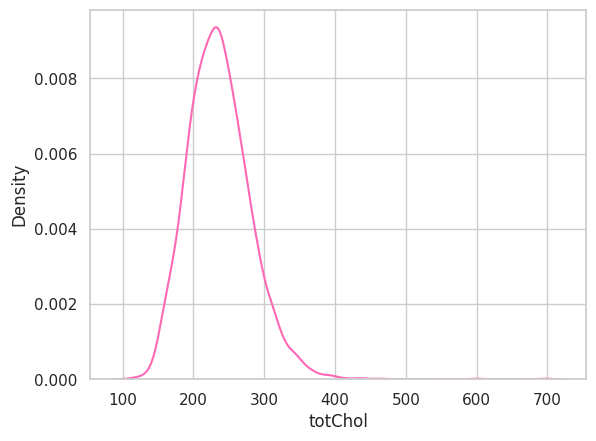

In [92]:
sns.kdeplot(data=train, x='totChol', color="hotpink")

<Axes: xlabel='sysBP', ylabel='Density'>

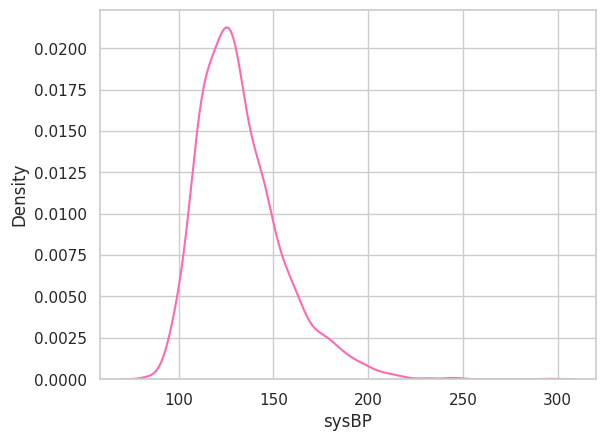

In [93]:
sns.kdeplot(data=train, x='sysBP', color="hotpink")

<Axes: xlabel='diaBP', ylabel='Density'>

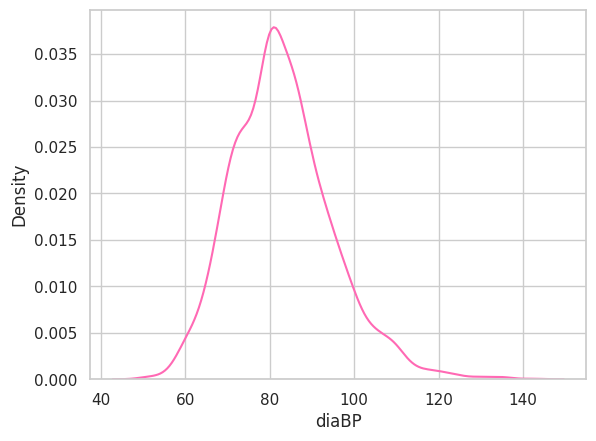

In [94]:
sns.kdeplot(data=train, x='diaBP', color="hotpink")

<Axes: xlabel='BMI', ylabel='Density'>

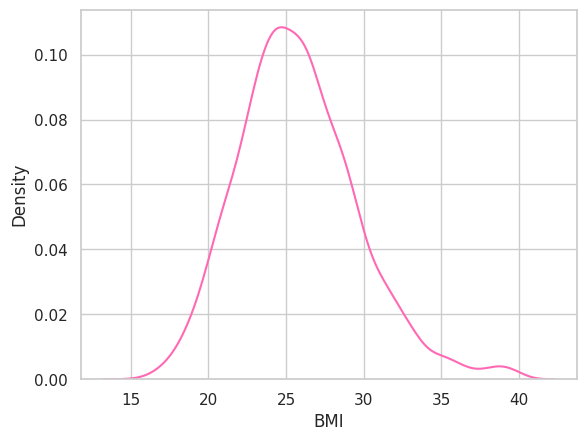

In [95]:
sns.kdeplot(data=train, x='BMI', color="hotpink")

<Axes: xlabel='heartRate', ylabel='Density'>

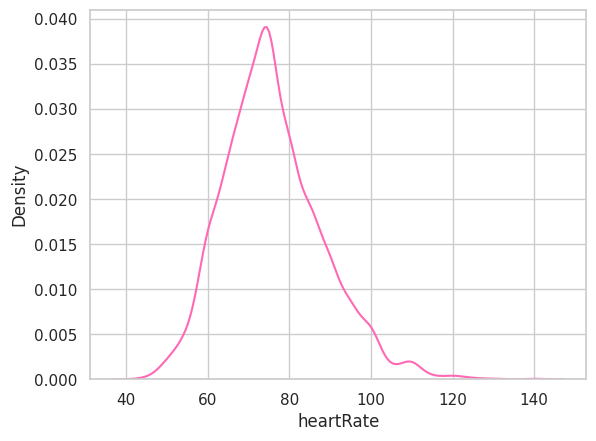

In [96]:
sns.kdeplot(data=train, x='heartRate', color="hotpink")

# Results

<Axes: xlabel='BMI', ylabel='Density'>

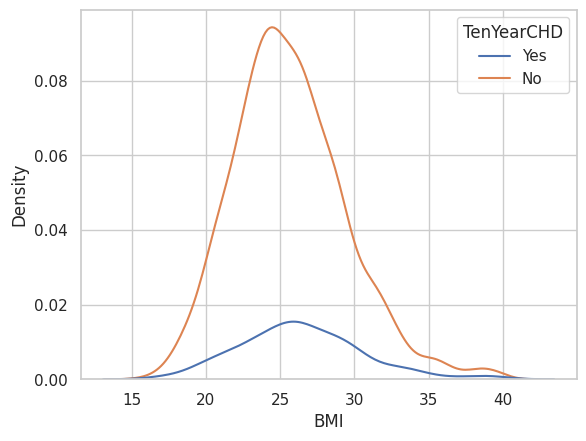

In [97]:
sns.kdeplot(data=train, x='BMI', hue="TenYearCHD")
# Slightly higher BMI for those WITH the risk of CHD than those who don't

<Axes: xlabel='age', ylabel='diaBP'>

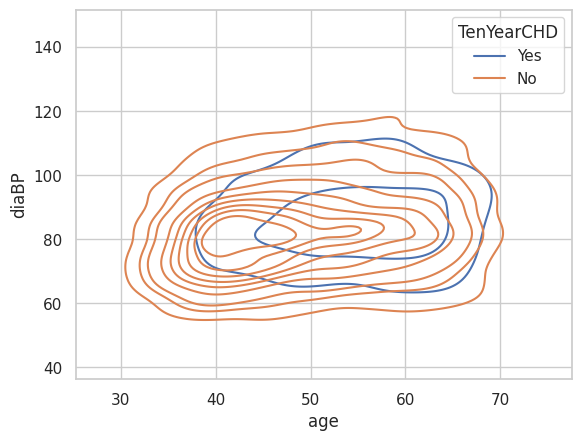

In [98]:
sns.kdeplot(data=train, x='age', y='diaBP', hue="TenYearCHD")

<Axes: xlabel='age', ylabel='totChol'>

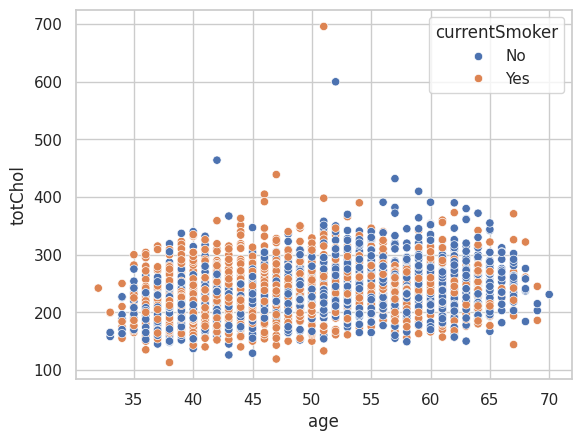

In [99]:
sns.scatterplot(data=train, x='age', y='totChol', hue="currentSmoker")

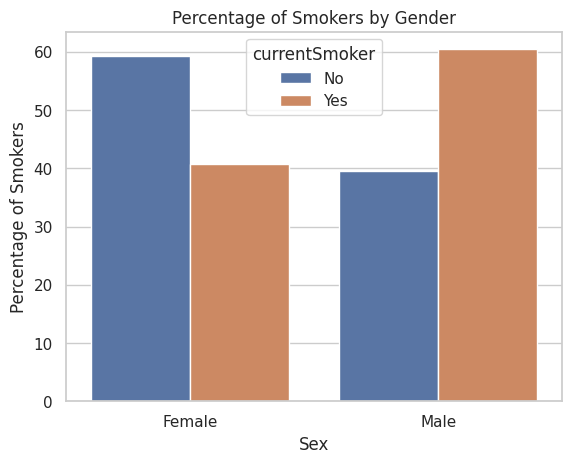

In [100]:
sns.set(style="whitegrid")
smoker_counts = train.groupby(['sex', 'currentSmoker']).size().reset_index(name='count')
total_counts = train.groupby('sex').size().reset_index(name='total')
merge = smoker_counts.merge(total_counts, on='sex')
merge['Smoker percentage'] = (merge['count'] / merge['total']) * 100

sns.barplot(data=merge, x='sex', y='Smoker percentage', hue='currentSmoker')
plt.xlabel('Sex')
plt.ylabel('Percentage of Smokers')
plt.title('Percentage of Smokers by Gender')
plt.show()

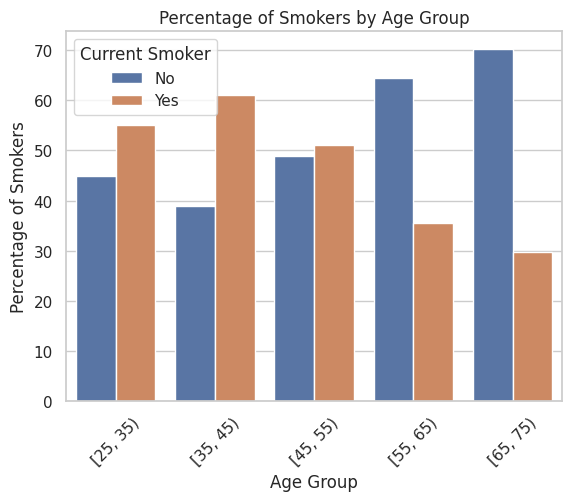

In [101]:
train['age_group'] = pd.cut(train['age'], bins=[25, 35, 45, 55, 65, 75], right=False)

# Calculate the smoker counts by age group
smoker_counts_by_age = train.groupby(['age_group', 'currentSmoker']).size().reset_index(name='count')
total_counts_by_age = train.groupby('age_group').size().reset_index(name='total')

# Merge the counts
merge_by_age = smoker_counts_by_age.merge(total_counts_by_age, on='age_group')
merge_by_age['Smoker percentage'] = (merge_by_age['count'] / merge_by_age['total']) * 100

# Set the style for the plot
sns.set(style="whitegrid")

# Create the bar plot
sns.barplot(data=merge_by_age, x='age_group', y='Smoker percentage', hue='currentSmoker')
plt.xlabel('Age Group')
plt.ylabel('Percentage of Smokers')
plt.title('Percentage of Smokers by Age Group')
plt.xticks(rotation=45)  # Rotate the x labels for better readability
plt.legend(title='Current Smoker')
plt.show()

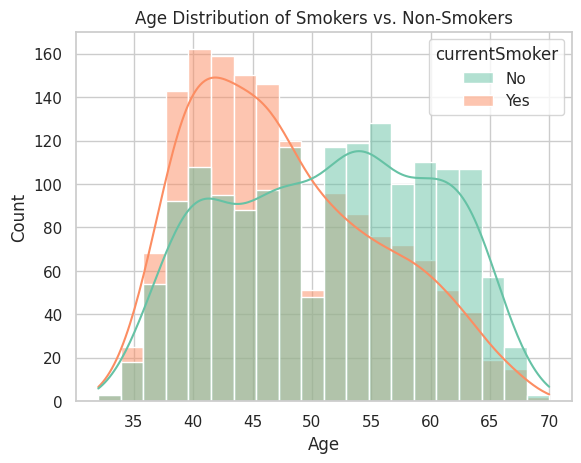

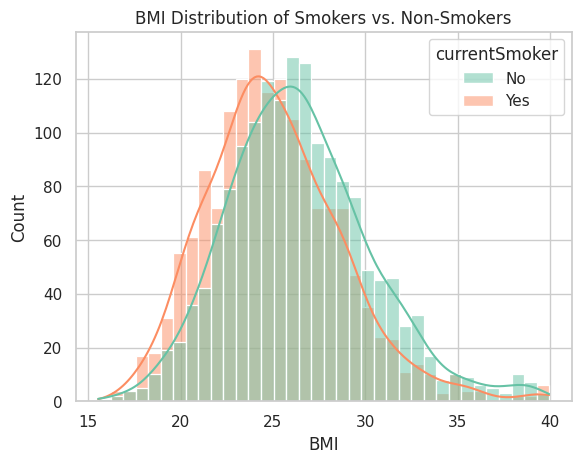

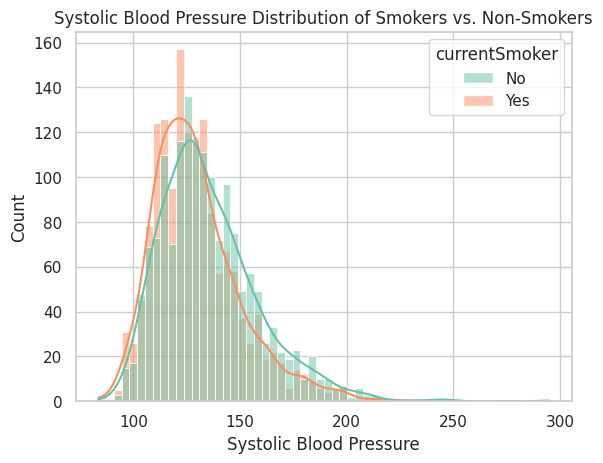

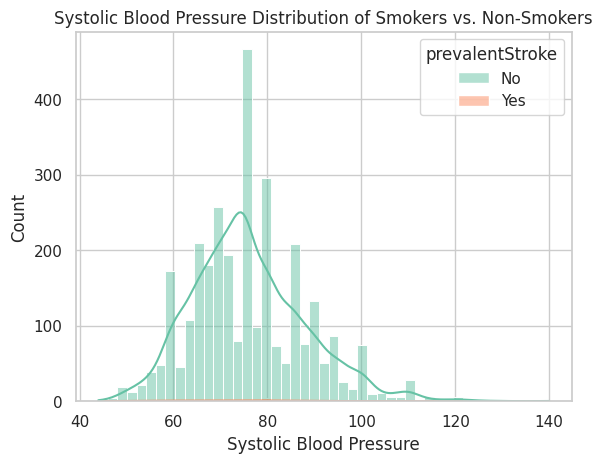

In [102]:
# Analysis of numerical variables :
# Age
sns.histplot(data=train, x='age', hue='currentSmoker', kde=True, palette="Set2")
plt.title('Age Distribution of Smokers vs. Non-Smokers')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# BMI
sns.histplot(data=train, x='BMI', hue='currentSmoker', kde=True, palette="Set2")
plt.title('BMI Distribution of Smokers vs. Non-Smokers')
plt.xlabel('BMI')
plt.ylabel('Count')
plt.show()

# Systolic blood pressure
sns.histplot(data=train, x='sysBP', hue='currentSmoker', kde=True, palette="Set2")
plt.title('Systolic Blood Pressure Distribution of Smokers vs. Non-Smokers')
plt.xlabel('Systolic Blood Pressure')
plt.ylabel('Count')
plt.show()

# Systolic blood pressure
sns.histplot(data=train, x='heartRate', hue='prevalentStroke', kde=True, palette="Set2")
plt.title('Systolic Blood Pressure Distribution of Smokers vs. Non-Smokers')
plt.xlabel('Systolic Blood Pressure')
plt.ylabel('Count')
plt.show()

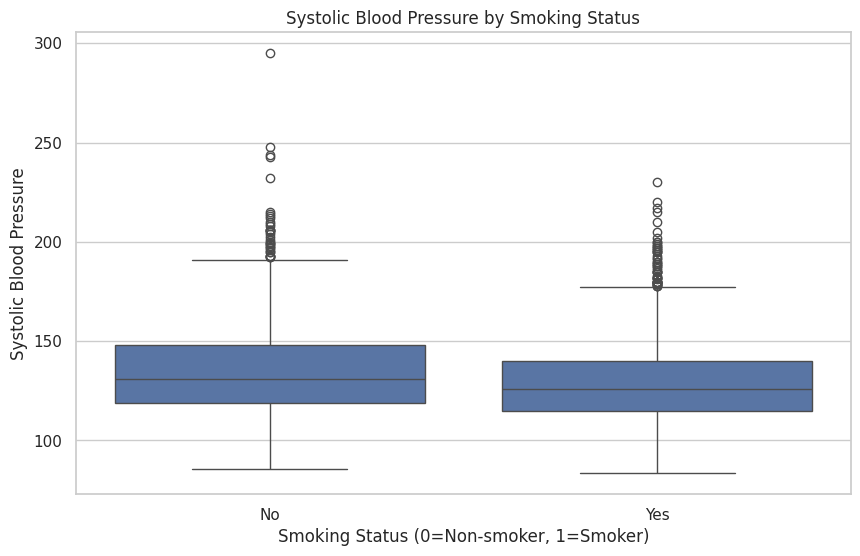

In [103]:
# Box plot for Systolic Blood Pressure by Smoking Status
plt.figure(figsize=(10, 6))
sns.boxplot(x='currentSmoker', y='sysBP', data=train)
plt.title('Systolic Blood Pressure by Smoking Status')
plt.xlabel('Smoking Status (0=Non-smoker, 1=Smoker)')
plt.ylabel('Systolic Blood Pressure')
plt.show()

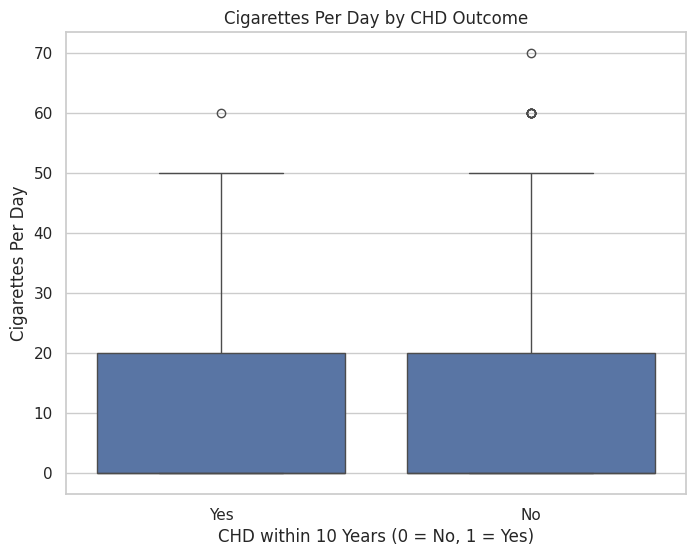

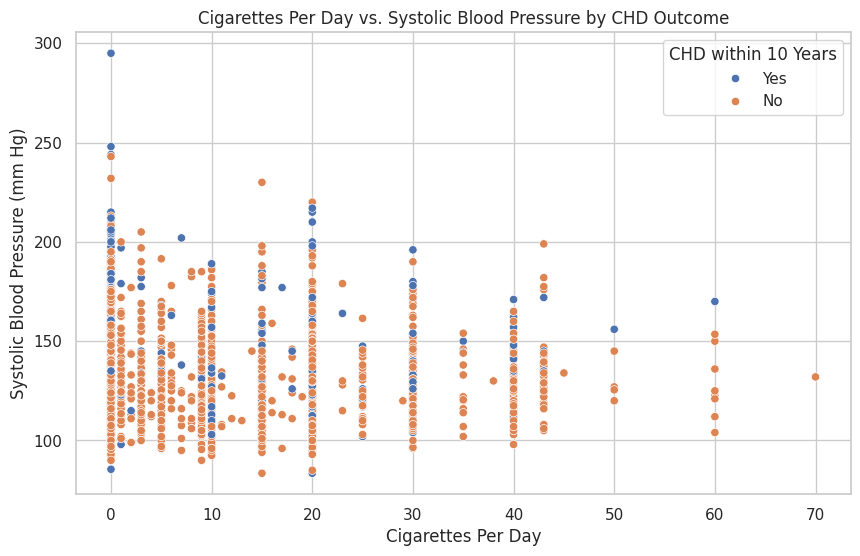

In [104]:
# Box Plot of Cigarettes Per Day by CHD Outcome
plt.figure(figsize=(8, 6))
sns.boxplot(x='TenYearCHD', y='cigsPerDay', data=train)
plt.title('Cigarettes Per Day by CHD Outcome')
plt.xlabel('CHD within 10 Years (0 = No, 1 = Yes)')
plt.ylabel('Cigarettes Per Day')
plt.show()

# 3. Scatter Plot of Cigarettes Per Day vs. Systolic Blood Pressure
plt.figure(figsize=(10, 6))
sns.scatterplot(x='cigsPerDay', y='sysBP', hue='TenYearCHD', data=train)
plt.title('Cigarettes Per Day vs. Systolic Blood Pressure by CHD Outcome')
plt.xlabel('Cigarettes Per Day')
plt.ylabel('Systolic Blood Pressure (mm Hg)')
plt.legend(title='CHD within 10 Years')
plt.show()

# Predictive Models

In [105]:
# K-Nearest Neighbors Classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)
y_pred_knn = knn.predict(x_test)

print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print("KNN Classification Report:\n", classification_report(y_test, y_pred_knn))

KNN Accuracy: 0.8433962264150944
KNN Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.97      0.91       903
           1       0.40      0.11      0.17       157

    accuracy                           0.84      1060
   macro avg       0.63      0.54      0.54      1060
weighted avg       0.79      0.84      0.80      1060



In [106]:
# Decision Tree Classifier
tree = DecisionTreeClassifier(max_depth=5)
tree.fit(x_train, y_train)
y_pred_tree = tree.predict(x_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_tree))
print("Decision Tree Classification Report:\n", classification_report(y_test, y_pred_tree))

Decision Tree Accuracy: 0.8452830188679246
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.98      0.92       903
           1       0.33      0.04      0.08       157

    accuracy                           0.85      1060
   macro avg       0.59      0.51      0.50      1060
weighted avg       0.78      0.85      0.79      1060



In [107]:
# Linear Regression as a Classifier
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)
y_pred_lin_reg = lin_reg.predict(x_test)
y_pred_lin_reg_class = [1 if x >= 0.5 else 0 for x in y_pred_lin_reg]

print("Linear Regression Accuracy:", accuracy_score(y_test, y_pred_lin_reg_class))
print("Linear Regression Classification Report:\n", classification_report(y_test, y_pred_lin_reg_class))

Linear Regression Accuracy: 0.8547169811320755
Linear Regression Classification Report:
               precision    recall  f1-score   support

           0       0.86      1.00      0.92       903
           1       0.71      0.03      0.06       157

    accuracy                           0.85      1060
   macro avg       0.78      0.51      0.49      1060
weighted avg       0.83      0.85      0.79      1060

